#### Airline Passenger Satisfaction

Import Reliable Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
!pip install missingno
import missingno as msno
import autoreload
import os
import sys
import csv

from collections import defaultdict, Counter

from sklearn.impute import SimpleImputer # Imputation transformer for completing missing values.
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer # Document-Term Matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

sb.set()
sb.set_style('dark')

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

%matplotlib inline
%reload_ext autoreload
%autoreload 2


  Using cached https://files.pythonhosted.org/packages/17/a2/be45b3bd2fe14cf9173f2337ab87a0f877d6847cf097e641eab4811a8b02/missingno-0.5.1-py3-none-any.whl


##### Load Data

In [3]:
train_df = pd.read_csv(r"D:\Open Classroom\Datasets\Airline Passenger Satisfaction\train.csv")
test_df = pd.read_csv(r"D:\Open Classroom\Datasets\Airline Passenger Satisfaction\test.csv")

In [4]:
new_df = train_df.append(test_df, ignore_index=True)
new_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
train_df.shape

(103904, 25)

##### Statistical Analysis

In [6]:
new_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
new_df.shape

(129880, 25)

In [8]:
round(new_df.describe())

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129487.0
mean,44159.0,64940.0,39.0,1190.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,15.0,15.0
std,31207.0,37493.0,15.0,997.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,38.0,38.0
min,0.0,1.0,7.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,16235.0,32471.0,27.0,414.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0
50%,38964.0,64940.0,40.0,844.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,0.0,0.0
75%,71433.0,97410.0,51.0,1744.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,12.0,13.0
max,103903.0,129880.0,85.0,4983.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1592.0,1584.0


In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
Unnamed: 0                           129880 non-null int64
id                                   129880 non-null int64
Gender                               129880 non-null object
Customer Type                        129880 non-null object
Age                                  129880 non-null int64
Type of Travel                       129880 non-null object
Class                                129880 non-null object
Flight Distance                      129880 non-null int64
Inflight wifi service                129880 non-null int64
Departure/Arrival time convenient    129880 non-null int64
Ease of Online booking               129880 non-null int64
Gate location                        129880 non-null int64
Food and drink                       129880 non-null int64
Online boarding                      129880 non-null int64
Seat comfort                         129880 non-null int64


In [10]:
new_df.isnull().sum().sort_values(ascending = False).head()

Arrival Delay in Minutes    393
satisfaction                  0
Gate location                 0
id                            0
Gender                        0
dtype: int64

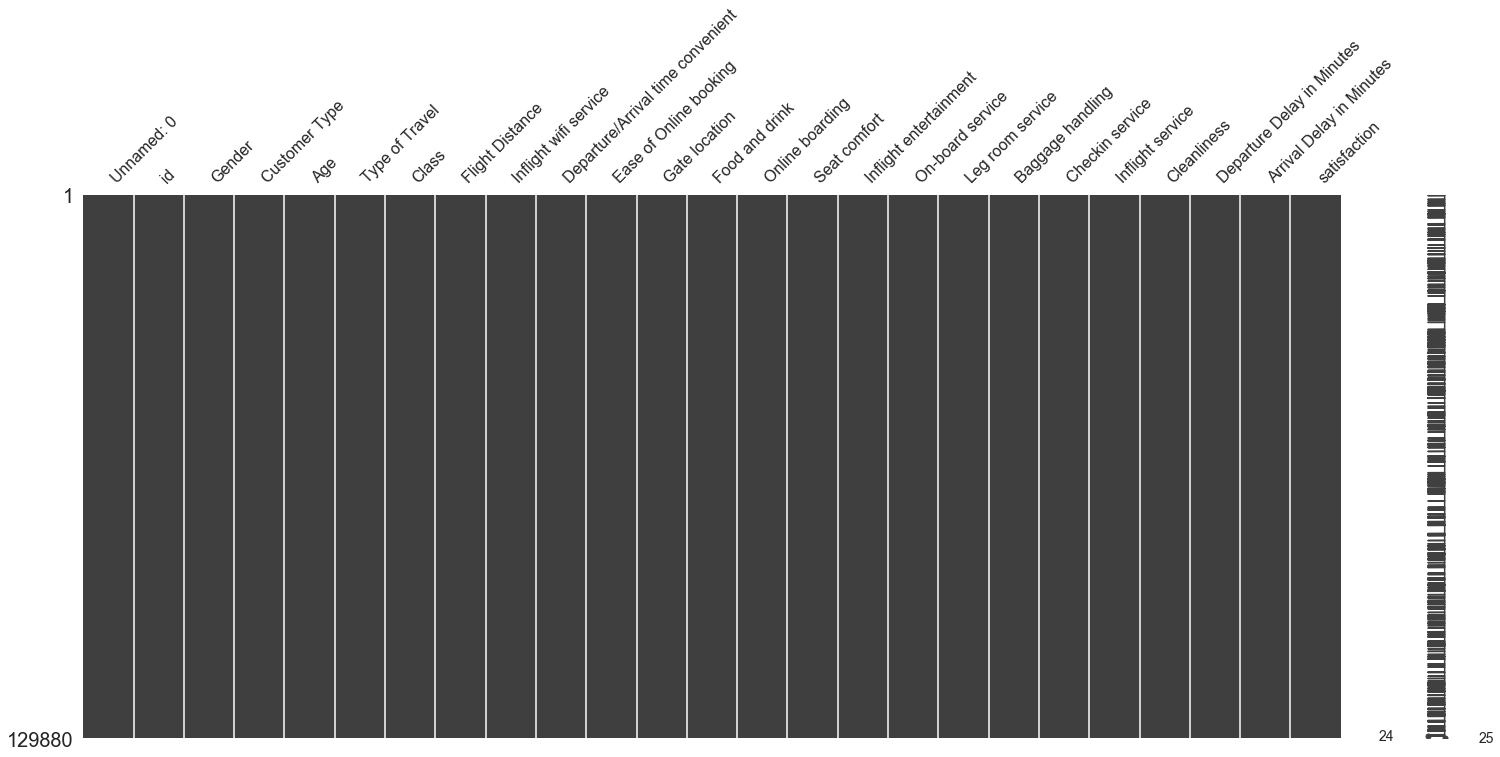

In [11]:
msno.matrix(new_df)

##### Data Cleaning

Eliminating NA Values in the Dataset

In [12]:
simpleImp = SimpleImputer(missing_values="NaN", strategy='median')
#simpleImp.fit(new_df["Arrival Delay in Minutes"])

In [13]:
new_df["Arrival Delay in Minutes"] =  new_df["Arrival Delay in Minutes"].fillna(new_df["Arrival Delay in Minutes"].median())

In [14]:
new_df.isnull().sum().sort_values(ascending = False).head()

satisfaction     0
Gate location    0
id               0
Gender           0
Customer Type    0
dtype: int64

In [15]:
new_df.drop(columns = ["Unnamed: 0"], inplace = True)

In [16]:
new_df.head(3)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied


#### One-Hot Encoding

In [17]:
le = LabelEncoder()

new_df["satisfaction_num"] = le.fit_transform(new_df["satisfaction"])

In [18]:
new_df.head(3)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction_num
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,1


In [19]:
x = new_df["Class"]

#x = x.apply(le.fit_transform)

y = new_df[["satisfaction_num"]]


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [21]:
print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (103904,)
x test:  (25976,)
y train:  (103904, 1)
y test:  (25976, 1)


#### Vectorization

In [22]:
vect = CountVectorizer()

In [23]:
x_train_vect = vect.fit_transform(x_train)

In [24]:
x_train_vect

<103904x3 sparse matrix of type '<class 'numpy.int64'>'
	with 111443 stored elements in Compressed Sparse Row format>

In [25]:
x_test_vect = vect.fit_transform(x_test)

In [26]:
x_test_vect

<25976x3 sparse matrix of type '<class 'numpy.int64'>'
	with 27848 stored elements in Compressed Sparse Row format>

#### Build and Evaluate Model

In [27]:
DTR = DecisionTreeRegressor()

In [28]:
%time DTR.fit(x_train_vect, y_train)

Wall time: 302 ms


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [29]:
dtr_predict = DTR.predict(x_train_vect)
dtr_predict

array([0.69479748, 0.69479748, 0.18693809, ..., 0.18693809, 0.18693809,
       0.18693809])

In [30]:
pred_score = DTR.score(x_train_vect, dtr_predict)
pred_score

1.0